In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shashank.shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shashank.shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shashank.shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shashank.shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv('DATASET/fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [4]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40594 entries, 0 to 40593
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40594 non-null  object 
 1   rating    40594 non-null  float64
 2   label     40594 non-null  object 
 3   text_     40594 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [6]:
sid = SentimentIntensityAnalyzer()
for index, row in df.iterrows():
    text1 = row['text_']
    sentiment_dict = sid.polarity_scores(text1)
    df.at[index, 'sentiment'] =sentiment_dict['compound']

In [7]:
df.describe()

,rating,sentiment
count,40594.000000,40594.000000
mean,4.255752,0.616085
std,1.142268,0.462680
min,1.000000,-0.999700
25%,4.000000,0.458800
50%,5.000000,0.819150
75%,5.000000,0.942500
max,5.000000,0.999900


In [8]:
df['rating'].value_counts()

rating
5.0    24569
4.0     8115
3.0     3788
1.0     2155
2.0     1967
Name: count, dtype: int64

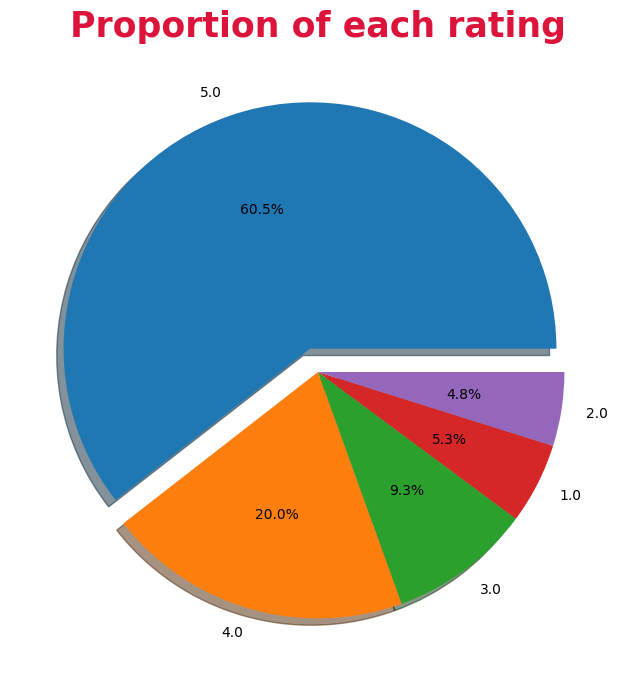

In [9]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [10]:
df['text_'] = df['text_'].astype(str)

In [11]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [12]:
df['text_'] = df['text_'].apply(preprocess)

In [13]:
df['text_'] = df['text_'].str.lower()

In [14]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [15]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [16]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

In [17]:
df

,category,rating,label,text_,sentiment
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti,0.9592
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year,0.8910
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow,0.7906
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i,0.7463
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month,0.7397
...,...,...,...,...,...
40589,Electronics_5,4.0,OR,nice product,0.4215
40590,Electronics_5,4.0,OR,charg expect,0.0000
40591,Electronics_5,4.0,OR,awesom fabul,0.8176
40592,Electronics_5,4.0,OR,best charger for iphon,0.6369


In [18]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')